In [32]:
import pandas as pd

In [33]:
data1=pd.read_csv('AID746AID1284red_test.csv')

In [34]:
data1.head()

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.60912,3.363,87.74,9,7,2,409.486,0,0,Active
1,0,0,0,0,0,0,0,0,0,0,...,3.73406,1.770,66.76,6,5,0,382.210,1,1,Active
2,0,0,0,0,0,0,0,0,0,0,...,3.84241,2.964,103.79,9,6,2,382.416,0,0,Active
3,0,0,0,0,0,0,0,0,0,0,...,3.50705,0.470,128.12,8,7,2,350.396,0,0,Active
4,0,0,0,0,0,0,0,0,0,0,...,3.95624,0.357,188.86,8,5,2,434.568,0,1,Active


In [35]:
import pandas as pd

# Load the dataset
data1 = pd.read_csv('AID746AID1284red_test.csv')

# Show first few rows
print("First 5 rows of data:")
print(data1.head())

# Check for missing values
print("\nMissing values in each column:")
print(data1.isnull().sum())

# Drop columns with all null values (if any)
data1.dropna(axis=1, how='all', inplace=True)

# Drop rows with any missing values (optional based on context)
data1.dropna(inplace=True)

# Remove duplicate rows
data1.drop_duplicates(inplace=True)

# Check data types
print("\nData types:")
print(data1.dtypes)

# If any non-numeric columns need encoding, encode them
# For example, if there's a column 'Activity' with 'active'/'inactive'
if 'Activity' in data1.columns:
    data1['Activity'] = data1['Activity'].map({'active': 1, 'inactive': 0})

# Reset index after dropping rows
data1.reset_index(drop=True, inplace=True)

# Final shape of the cleaned data
print("\nCleaned data shape:", data1.shape)


First 5 rows of data:
   NEG_01_NEG  NEG_02_NEG  NEG_03_NEG  NEG_04_NEG  NEG_05_NEG  NEG_06_NEG  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   NEG_07_NEG  NEG_03_POS  NEG_04_POS  NEG_05_POS  ...  WBN_LP_H_1.00  XLogP  \
0           0           0           0           0  ...        3.60912  3.363   
1           0           0           0           0  ...        3.73406  1.770   
2           0           0           0           0  ...        3.84241  2.964   
3           0           0           0           0  ...        3.50705  0.470   
4           0           0           0           0  ...        3.95624  0.357   

      PSA  NumRot  NumHBA  NumHBD 

In [36]:
print(data1.columns)


Index(['NEG_01_NEG', 'NEG_02_NEG', 'NEG_03_NEG', 'NEG_04_NEG', 'NEG_05_NEG',
       'NEG_06_NEG', 'NEG_07_NEG', 'NEG_03_POS', 'NEG_04_POS', 'NEG_05_POS',
       ...
       'WBN_LP_H_1.00', 'XLogP', 'PSA', 'NumRot', 'NumHBA', 'NumHBD', 'MW',
       'BBB', 'BadGroup', 'Outcome'],
      dtype='object', length=155)


In [37]:
# Split features and target
X = data1.drop(columns=['Outcome'])  # All columns except 'Outcome'
y = data1['Outcome']                 # Target column


In [31]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

🔹 Logistic Regression Results
Accuracy: 0.9983270598076118
Classification Report:
               precision    recall  f1-score   support

      Active       0.00      0.00      0.00         4
    Inactive       1.00      1.00      1.00      2387

    accuracy                           1.00      2391
   macro avg       0.50      0.50      0.50      2391
weighted avg       1.00      1.00      1.00      2391



C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

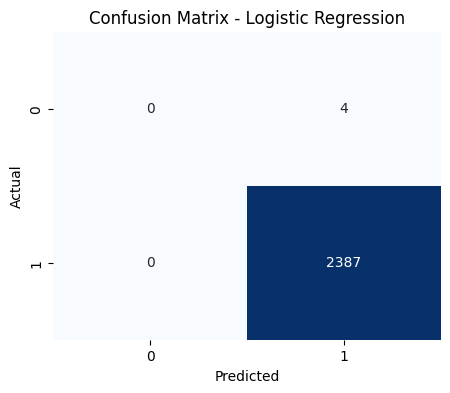

In [40]:

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

🔹 Random Forest Classifier Results
Accuracy: 0.9983270598076118
Classification Report:
               precision    recall  f1-score   support

      Active       0.00      0.00      0.00         4
    Inactive       1.00      1.00      1.00      2387

    accuracy                           1.00      2391
   macro avg       0.50      0.50      0.50      2391
weighted avg       1.00      1.00      1.00      2391



C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

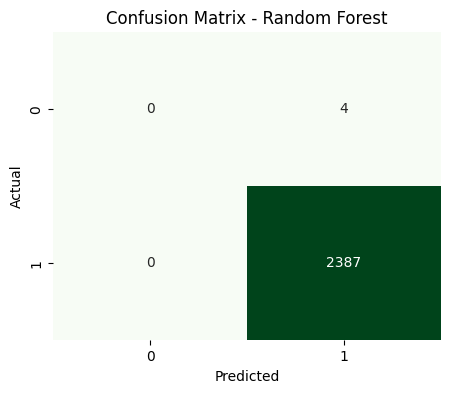

In [43]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("🔹 Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()